# Derivation of a slightly more efficient Kmer Distance updating formula
___

## Problem statement
Given two vectors of real numbers $R, C$ of the same lengths $4^k$, and the following distance metric:

$$KmerDist(C,R) = \frac{1}{2k}\sum _{i = 1}^{4^{k}}\left(R_{i}-C_{i}\right)^{2} $$

Where k is a constant. When updating the KFV in an iteration, the operation stated in the report (page 4, equation 4) can be condensed into the following mathematical/computational problem -
 
Simplify the following operation to minimize the number of computationally costly operations:

$$ KmerDist_{new}(C,R) = KmerDist_{old}(C,R) - \frac{1}{2k}((R_{\Delta}-C_{\Delta})^2 + (R_{\delta}-C_{\delta})^2 - (R_{\Delta}-(C_{\Delta} + 1))^2 - (R_{\delta}-(C_{\delta} - 1))^2) $$

## Solution
___
Rearranging and expanding the equation, we obtain the following:

$$ \therefore KmerDist_{new}(C,R) = KmerDist_{old}(C,R) - \frac{1}{2k}(R_{\Delta}-C_{\Delta})^2 - \frac{1}{2k}(R_{\delta}-C_{\delta})^2 + \frac{1}{2k}(R_{\Delta}-(C_{\Delta} + 1))^2 + \frac{1}{2k}(R_{\delta}-(C_{\delta} - 1))^2 $$

$$ \therefore KmerDist_{new}(C,R) = \frac{1}{2k} \left(2k\cdot KmerDist_{old}(C,R) - (R_{\Delta}-C_{\Delta})^2 - (R_{\delta}-C_{\delta})^2 + (R_{\Delta}-(C_{\Delta} + 1))^2 + (R_{\delta}-(C_{\delta} - 1))^2 \right) $$

$$ \therefore 2k\cdot KmerDist_{new}(C,R) - 2k\cdot KmerDist_{old}(C,R) = LHS = -(R_{\Delta}-C_{\Delta})^2 - (R_{\delta}-C_{\delta})^2 + (R_{\Delta}-(C_{\Delta} + 1))^2 + (R_{\delta}-(C_{\delta} - 1))^2 $$

Working just with the RHS, we can obtain the following series of expansions and simplifications:

\begin{equation*}
    \begin{split}

        \therefore LHS & = -(R_{\Delta}-C_{\Delta})^2 - (R_{\delta}-C_{\delta})^2 + (R_{\Delta}-C_{\Delta} - 1)^2 + (R_{\delta}-C_{\delta} + 1)^2 \\ 

        & = -(R_{\Delta}^{2} -2R_{\Delta}C_{\Delta} + C_{\Delta}^{2}) - ( R_{\delta}^{2} -2 R_{\delta} C_{\delta} + C_{\delta}^{2}) + (R_{\Delta}-C_{\Delta} - 1)^2 + (R_{\delta}-C_{\delta} + 1)^2 \\

        & =  -R_{\Delta}^{2}+2R_{\Delta}C_{\Delta}-C_{\Delta}^{2}-R_{\delta}^{2} +2 R_{\delta} C_{\delta} - C_{\delta}^{2} \\
        &\text{\hspace{20pt}} + (R_{\Delta}-C_{\Delta} - 1)^2 + (R_{\delta}-C_{\delta} + 1)^2 \\

        & =  -R_{\Delta}^{2}+2R_{\Delta}C_{\Delta}-C_{\Delta}^{2}-R_{\delta}^{2} +2 R_{\delta} C_{\delta} - C_{\delta}^{2} \\
            &\text{\hspace{20pt}} + (R_{\Delta}^2-2R_{\Delta}C_{\Delta} - 2R_{\Delta} + C_{\Delta}^2+2C_{\Delta}+1) \\
            &\text{\hspace{20pt}} + (R_{\delta}^2-2R_{\delta}C_{\delta} + 2R_{\delta} + C_{\delta}^2-2C_{\delta}+1) \\ 

        & = -R_{\Delta}^{2}+2R_{\Delta}C_{\Delta}-C_{\Delta}^{2}-R_{\delta}^{2} +2 R_{\delta} C_{\delta} - C_{\delta}^{2} \\ 
            &\text{\hspace{20pt}} + R_{\Delta}^2-2R_{\Delta}C_{\Delta} - 2R_{\Delta} + C_{\Delta}^2+2C_{\Delta} \\
            &\text{\hspace{20pt}} + R_{\delta}^2-2R_{\delta}C_{\delta} + 2R_{\delta} + C_{\delta}^2-2C_{\delta}+2 \\ 

    \end{split}
\end{equation*}

Cancelling out conjugate squared terms yields the following simplification:

\begin{equation*}
    \begin{split}

        \therefore LHS & = -2R_{\Delta} + 2C_{\Delta} + 2R_{\delta} - 2C_{\delta} + 2 \\
        & = 2(C_{\Delta} + R_{\delta}  - R_{\Delta} - C_{\delta})

    \end{split}
\end{equation*}

Substituting the original definition for the LHS, we obtain the following:

$$\because LHS = 2k\cdot KmerDist_{new}(C,R) - 2k\cdot KmerDist_{old}(C,R)$$
$$\therefore 2k\cdot KmerDist_{new}(C,R) = 2k\cdot KmerDist_{old}(C,R) + 2(C_{\Delta} + R_{\delta}  - R_{\Delta} - C_{\delta})$$
$$\therefore KmerDist_{new}(C,R) = KmerDist_{old}(C,R) + \frac{1}{k}(C_{\Delta} + R_{\delta}  - R_{\Delta} - C_{\delta})$$

### Comparison of the simplified and original formula
___

Comparing the new ``simplified" formula with the original and assuming that $\frac{1}{2k}$ and $\frac{1}{k}$ are precomputed, we can see that for the original operation:

$$ KmerDist_{new}(C,R) = KmerDist_{old}(C,R) - \frac{1}{2k}((R_{\Delta}-C_{\Delta})^2 + (R_{\delta}-C_{\delta})^2 - (R_{\Delta}-(C_{\Delta} + 1))^2 - (R_{\delta}-(C_{\delta} - 1))^2) $$

We have 10 additions/subtractions, 1 multiplication, and 4 squaring operations that are needed to obtain the new KmerDist after the window iterates.

Comparing it to the simplified operation:

$$KmerDist_{new}(C,R) = KmerDist_{old}(C,R) + \frac{1}{k}(C_{\Delta} + R_{\delta}  - R_{\Delta} - C_{\delta})$$

We have 4 additions/subtractions, and one multiplication. This is clearly much more faster in theory

### Implementation and verification of the simplified equation
___
To verify that the derivation was correct, the formulas were compiled into functions and their results were compared:

In [34]:
# implementation of the formulas
function original_formula(KmerDist_old::Float64, C_D::Float64, C_d::Float64, R_D::Float64, R_d::Float64, k::Int64 = 6)
    PreComputed_ScaleFactor::Float64 = 1/(2*k)
    return KmerDist_old - PreComputed_ScaleFactor*((R_D-C_D)^2 +(R_d-C_d)^2 - (R_D-(C_D+1))^2 - (R_d-(C_d-1))^2)
end

function simplified_formula(KmerDist_old::Float64, C_D::Float64, C_d::Float64, R_D::Float64, R_d::Float64, k::Int64 = 6)
    PreComputed_ScaleFactor::Float64 = 1/k
    return KmerDist_old + PreComputed_ScaleFactor*(C_D+R_d-R_D-C_d)
end

simplified_formula (generic function with 3 methods)

In [51]:
# testing the formulas with arbitray numbers that are typically used in KmerGMA:

KmerDist_old = Float64(32.5)
C_D, R_D = Float64(1), Float64(2)
C_d, R_d = Float64(3), Float64(0) 

println("Result obtained by the original formula:")
println(original_formula(KmerDist_old, C_D, C_d, R_D, R_d))
println("Result obtained by the simplified formula")
println(simplified_formula(KmerDist_old, C_D, C_d, R_D, R_d))

Result obtained by the original formula:
32.0
Result obtained by the simplified formula
31.833333333333332


Although the results are not exactly the same, the minute difference is likely simply caused by an accumulation of floating point arithmetic errors. To somewhat verify this claim, a random assortment of inputs and outputs can be simulated, and the absolute differences of the values made by each formula can be plotted with the following code

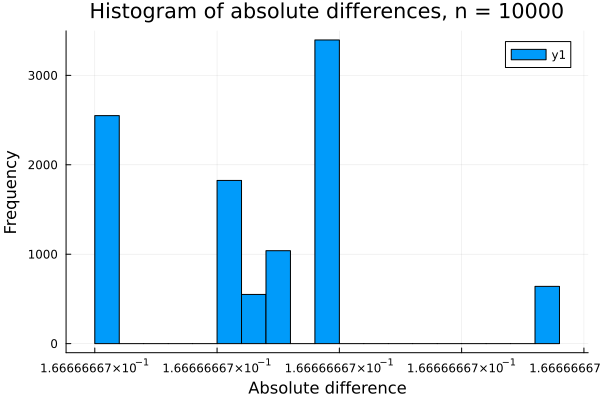

In [58]:
using Random, Plots

function get_difference_plot(num_range::Int64; seed::Int64 = 42)
    Random.seed!(seed)
    absolute_differences = Float64[]

    for trial in 1:num_range
        KmerDist_old = Float64(rand(1:num_range))
        C_D, R_D = Float64(rand(1:num_range)), Float64(rand(1:num_range))
        C_d, R_d = Float64(rand(1:num_range)), Float64(rand(1:num_range)) 
        
        original_formula_output = original_formula(KmerDist_old, C_D, C_d, R_D, R_d)
        simplified_formula_output = simplified_formula(KmerDist_old, C_D, C_d, R_D, R_d)

        push!(absolute_differences, abs(original_formula_output-simplified_formula_output))
    end
    return Plots.histogram(absolute_differences,
        title = "Histogram of absolute differences, n = $num_range",
        xlabel = "Absolute difference", ylabel = "Frequency")
end

get_difference_plot(10^4)

From the histogram, it can be reasonably inferred that the difference is solely due to accumulations of floating point errors. This fact is highlighted by the fact that the variance in absolute differences is so negligible that the x-axis ticks did not even have visible differences to eachother, and the error seems to be about 0.16666... = $\frac{1}{6}$ which is a very small range. This solidifies the fact that the formula was derived correctly.

### Benchmarking of the formulas
___
The input values were purposely made quite large to try and quantify and difference in runtime. 

In [59]:
using BenchmarkTools

KmerDist_old = Float64(2 << 20)
C_D, R_D = Float64(2 << 11), Float64(2 << 8)
C_d, R_d = Float64(3 << 24), Float64(9 << 4) 

(5.0331648e7, 144.0)

In [68]:
@benchmark original_formula(KmerDist_old, C_D, C_d, R_D, R_d)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  5.900 ns … 48.300 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.400 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.928 ns ±  1.845 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▅ █▆▄█▄▁▇▁                           ▂▁▁▁▁▁▁▁▁ ▂          ▂
  ██▇████████▇▇▇▇▇██▇█▇▅▅▃▃▃▅▁▇▆▆▅▆▇▆▇█▇███████████████▇▆▆▇▆ █
  5.9 ns       Histogram: log(frequency) by time     12.3 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [65]:
@benchmark simplified_formula(KmerDist_old, C_D, C_d, R_D, R_d)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  4.800 ns … 154.600 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.000 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.046 ns ±   1.920 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▃    ▁ ▄█▆     ██▃     ▆▄                                  ▂
  ███▁▇▄█▁███▁▆▄█▁███▁▇▆▇▁███▁▆█▇▁▇█▇▁▇▇▇▁▇▆▆▁▆▇▆▁▅▇▇▁▆▇▇▁█▇▇ █
  4.8 ns       Histogram: log(frequency) by time       9.2 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

From the benchmarking it can be noticed that the runtime saved is unfortunately negligible, but this simplified formula is useful nonetheless.